In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter, ImageDraw
from PIL.ImageFilter import (
    UnsharpMask
    )

(-0.5, 809.5, 1079.5, -0.5)

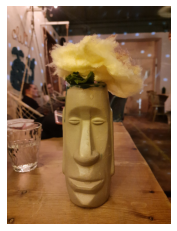

In [14]:
path = "../input/my-photo-alc/U69TeLCBF5E.jpg"
img = plt.imread(path)
plt.imshow(img)
#plt.imshow(img.mean(2))
plt.axis('off')


In [18]:
img = Image.open(path)
hard_blur = img.filter(ImageFilter.BoxBlur(radius=10))
hard_blur.thumbnail((256, 256))
plt.imsave("hard_blur.jpg", img, format="jpg")
hard_blur

In [19]:
img = Image.open(path)
dimg = img.filter(UnsharpMask(radius=2, percent=150, threshold=3))
dimg.thumbnail((256, 256))
plt.imsave("dimg.jpg", img, format="jpg")
dimg

In [20]:
img = Image.open(path)
blurred = img.filter(ImageFilter.BLUR)
blurred.thumbnail((256, 256))
# edges = img.filter(ImageFilter.EDGE_ENHANCE_MORE)
contour = img.filter(ImageFilter.CONTOUR).filter(ImageFilter.EDGE_ENHANCE_MORE)
contour.thumbnail((256, 256))
plt.imsave("contour.jpg", contour, format="jpg")
plt.imsave("blurred.jpg", blurred, format="jpg")
contour

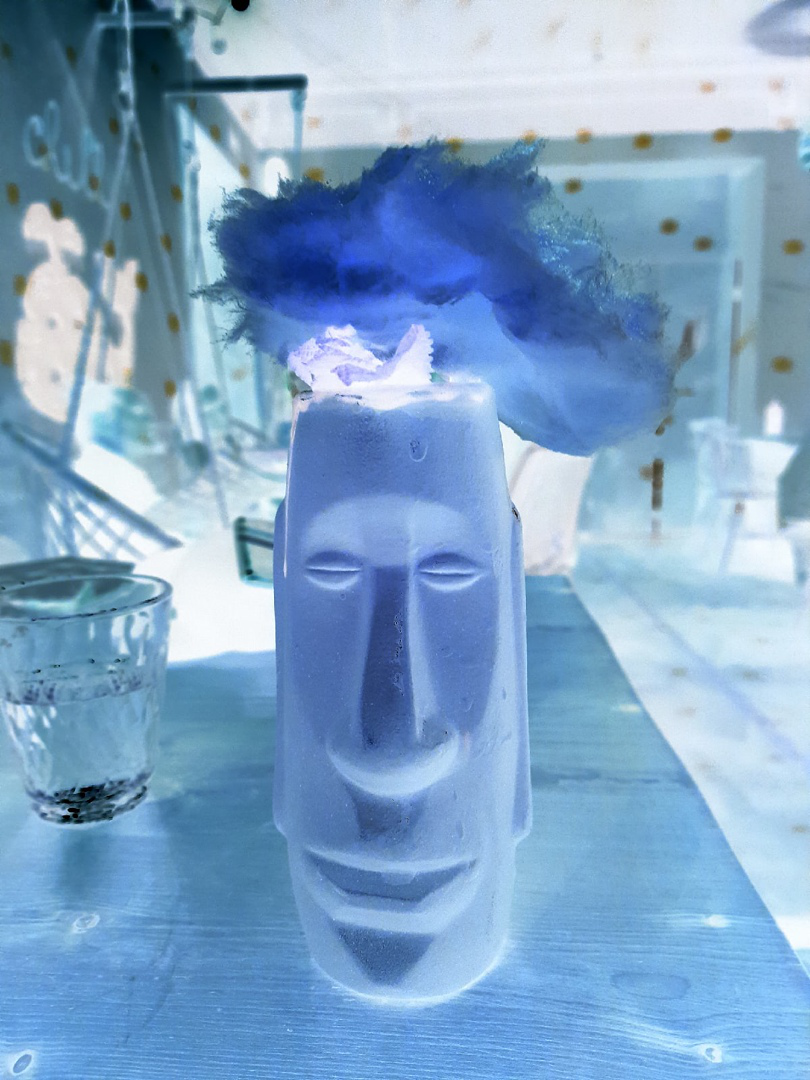

In [27]:
img = Image.open(path)
draw = ImageDraw.Draw(img) 
width = img.size[0] 
height = img.size[1]
pix = img.load()

for x in range(width):
   for y in range(height):
      r = pix[x, y][0]
      g = pix[x, y][1]
      b = pix[x, y][2]
      draw.point((x, y), (255 - r, 255 - g, 255 - b))
#img.thumbnail((256, 256))
plt.imsave("negative.png", img, format="png")
img

In [23]:
img = Image.open(path)
draw = ImageDraw.Draw(img) 
width = img.size[0] 
height = img.size[1]
pix = img.load()
for i in range(width):
    for j in range(height):
        a = pix[i, j][0]
        b = pix[i, j][1]
        c = pix[i, j][2]
        S = a + b + c
        if (S > (((255 - 10) // 2) * 3)):
            a, b, c = 255, 255, 255
        else:
            a, b, c = 0, 0, 0
        draw.point((i, j), (a, b, c))
img.thumbnail((256, 256))
plt.imsave("black_white.jpg", img, format="jpg")
img